### find out how deep is the ocean basin of your interest is in ACCESS-OM2-01 (to help you estimate how many depth layers to save for diagnostics)

In [1]:
from scipy import *
from pylab import *
from numpy import *
import xarray as xr
from dask.distributed import Client,LocalCluster
client = Client()
client

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34037 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:45663 Dashboard: http://127.0.0.1:34037/status,Cluster Workers: 4 Cores: 8 Memory: 30.06 GB


In [101]:
ds_topog = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_20201102/mom_01deg/topog.nc')
ds_tsini = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_20201102/mom_01deg/ocean_temp_salt.res.nc')

In [102]:
ds_topog = ds_topog.rename(({'xx':'GRID_X_T', 'yy':'GRID_Y_T'}))
ds_topog['GRID_X_T'] = ds_tsini['GRID_X_T']
ds_topog['GRID_Y_T'] = ds_tsini['GRID_Y_T']

### Here enter the longitude and latitudinal range of your interest.
0. replace x0,x1,y0,y1.
1. for longitude, use the range 0-360, where 0 is at Greenwich and increases Eastward.
2. for latitude, use positive for NH and negative for SH.

In [193]:
x0 = 98
x1 = 120
y0 = 1
y1 = 7

#convert to -280 to 80 coordinate system of MOM
if x0 > 80:
    x0 = x0 -360
if x1 > 80:
    x1 = x1 - 360

### Below, you should see the bathymetry of your study region with min, max, mean depths printed.

max depth: 10.432805061340332
min depth: 5315.41650390625
mean depth: 439.8091


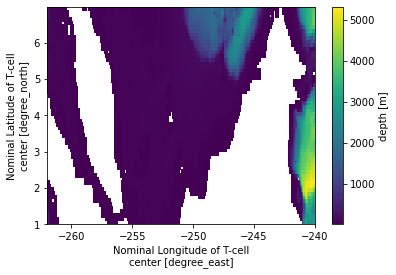

In [194]:
my_zone = ds_topog['depth'].sel(GRID_X_T=slice(x0,x1),GRID_Y_T=slice(y0,y1))
print('max depth:',my_zone.min().values)
print('min depth:',my_zone.max().values)
print('mean depth:',my_zone.mean().values)
my_zone.plot(vmin=my_zone.min(),vmax=my_zone.max())